In [ ]:
# !pip install Arabic-Stopwords
# !pip install emojiww
# !pip install qalsadi
# !pip install emoji
# !pip install tensorflow==2.9

In [ ]:
# !pip install --upgrade tensorflow
# from tensorflow.python.data.ops import range_op

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from plotly.offline import init_notebook_mode, iplot
#from keras.utils import np_utils
# import qalsadi.lemmatizer
from nltk.stem.isri import ISRIStemmer
import re
# import emoji
from nltk.corpus import stopwords
init_notebook_mode(connected=True)
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from operator import is_not
import tensorflow as tf
from functools import partial
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score,make_scorer,precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.svm import LinearSVC
from keras import optimizers
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras.backend import clear_session

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Loading and Preprocessing

In [ ]:
df_train=pd.read_csv("ArabicTextClassificationDataset/train.csv",header=None)
df_test=pd.read_csv("ArabicTextClassificationDataset/test.csv",header=None)
df_val=pd.read_csv("ArabicTextClassificationDataset/dev.csv",header=None)

In [ ]:
df_train.rename(columns={0:"review",1:"label"},inplace=True)
df_test.rename(columns={0:"review",1:"label"},inplace=True)
df_val.rename(columns={0:"review",1:"label"},inplace=True)

In [ ]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)
df_val.dropna(inplace=True)

In [ ]:
df_train

In [ ]:
df_val.isnull().any()

In [ ]:
df_train.drop(df_train[df_train['review'].duplicated() == True].index, axis = 0, inplace = True)
df_test.drop(df_test[df_test['review'].duplicated() == True].index, axis = 0, inplace = True)
df_val.drop(df_val[df_val['review'].duplicated() == True].index, axis = 0, inplace = True)

In [ ]:
df_train.reset_index(drop=True,inplace = True)
df_test.reset_index(drop=True,inplace = True)
df_val.reset_index(drop=True,inplace = True)

In [ ]:
df_train

In [ ]:
def data_preprocessing(df):
    emojis = {
        "🙂":"يبتسم",
        "😂":"يضحك",
        "💔":"قلب حزين",
        "🙂":"يبتسم",
        "❤️":"حب",
        "❤":"حب",
        "😍":"حب",
        "😭":"يبكي",
        "😢":"حزن",
        "😔":"حزن",
        "♥":"حب",
        "💜":"حب",
        "😅":"يضحك",
        "🙁":"حزين",
        "💕":"حب",
        "💙":"حب",
        "😞":"حزين",
        "😊":"سعادة",
        "👏":"يصفق",
        "👌":"احسنت",
        "😴":"ينام",
        "😀":"يضحك",
        "😌":"حزين",
        "🌹":"وردة",
        "🙈":"حب",
        "😄":"يضحك",
        "😐":"محايد",
        "✌":"منتصر",
        "✨":"نجمه",
        "🤔":"تفكير",
        "😏":"يستهزء",
        "😒":"يستهزء",
        "🙄":"ملل",
        "😕":"عصبية",
        "😃":"يضحك",
        "🌸":"وردة",
        "😓":"حزن",
        "💞":"حب",
        "💗":"حب",
        "😑":"منزعج",
        "💭":"تفكير",
        "😎":"ثقة",
        "💛":"حب",
        "😩":"حزين",
        "💪":"عضلات",
        "👍":"موافق",
        "🙏🏻":"رجاء طلب",
        "😳":"مصدوم",
        "👏🏼":"تصفيق",
        "🎶":"موسيقي",
        "🌚":"صمت",
        "💚":"حب",
        "🙏":"رجاء طلب",
        "💘":"حب",
        "🍃":"سلام",
        "☺":"يضحك",
        "🐸":"ضفدع",
        "😶":"مصدوم",
        "✌️":"مرح",
        "✋🏻":"توقف",
        "😉":"غمزة",
        "🌷":"حب",
        "🙃":"مبتسم",
        "😫":"حزين",
        "😨":"مصدوم",
        "🎼 ":"موسيقي",
        "🍁":"مرح",
        "🍂":"مرح",
        "💟":"حب",
        "😪":"حزن",
        "😆":"يضحك",
        "😣":"استياء",
        "☺️":"حب",
        "😱":"كارثة",
        "😁":"يضحك",
        "😖":"استياء",
        "🏃🏼":"يجري",
        "😡":"غضب",
        "🚶":"يسير",
        "🤕":"مرض",
        "‼️":"تعجب",
        "🕊":"طائر",
        "👌🏻":"احسنت",
        "❣":"حب",
        "🙊":"مصدوم",
        "💃":"سعادة مرح",
        "💃🏼":"سعادة مرح",
        "😜":"مرح",
        "👊":"ضربة",
        "😟":"استياء",
        "💖":"حب",
        "😥":"حزن",
        "🎻":"موسيقي",
        "✒":"يكتب",
        "🚶🏻":"يسير",
        "💎":"الماظ",
        "😷":"وباء مرض",
        "☝":"واحد",
        "🚬":"تدخين",
        "💐" : "ورد",
        "🌞" : "شمس",
        "👆" : "الاول",
        "⚠️" :"تحذير",
        "🤗" : "احتواء",
        "✖️": "غلط",
        "📍"  : "مكان",
        "👸" : "ملكه",
        "👑" : "تاج",
        "✔️" : "صح",
        "💌": "قلب",
        "😲" : "مندهش",
        "💦": "ماء",
        "🚫" : "خطا",
        "👏🏻" : "برافو",
        "🏊" :"يسبح",
        "👍🏻": "تمام",
        "⭕️" :"دائره كبيره",
        "🎷" : "ساكسفون",
        "👋": "تلويح باليد",
        "✌🏼": "علامه النصر",
        "🌝":"مبتسم",
        "➿"  : "عقده مزدوجه",
        "💪🏼" : "قوي",
        "📩":  "تواصل معي",
        "☕️": "قهوه",
        "😧" : "قلق و صدمة",
        "🗨": "رسالة",   
        "❗️" :"تعجب",
        "🙆🏻": "اشاره موافقه",
        "👯" :"اخوات",
        "©" :  "رمز",
        "👵🏽" :"سيده عجوزه",
        "🐣": "كتكوت",  
        "🙌": "تشجيع",
        "🙇": "شخص ينحني",
        "👐🏽":"ايدي مفتوحه",    
        "👌🏽": "بالظبط",
        "⁉️" : "استنكار",
        "⚽️": "كوره",
        "🕶" :"حب",
        "🎈" :"بالون",    
        "🎀":    "ورده",
        "💵":  "فلوس",   
        "😋":  "جائع",
        "😛":  "يغيظ",
        "😠":  "غاضب",
        "✍🏻":  "يكتب",
        "🌾":  "ارز",
        "👣":  "اثر قدمين",
        "❌":"رفض",
        "🍟":"طعام",
        "👬":"صداقة",
        "🐰":"ارنب",
        "☂":"مطر",
        "⚜":"مملكة فرنسا",
        "🐑":"خروف",
        "🗣":"صوت مرتفع",
        "👌🏼":"احسنت",
        "☘":"مرح",
        "😮":"صدمة",
        "😦":"قلق",
        "⭕":"الحق",
        "✏️":"قلم",
        "ℹ":"معلومات",
        "🙍🏻":"رفض",
        "⚪️":"نضارة نقاء",
        "🐤":"حزن",
        "💫":"مرح",
        "💝":"حب",
        "🍔":"طعام",
        "❤︎":"حب",
        "✈️":"سفر",
        "🏃🏻‍♀️":"يسير",
        "🍳":"ذكر",
        "🎤":"مايك غناء",
        "🎾":"كره",
        "🐔":"دجاجة",
        "🙋":"سؤال",
        "📮":"بحر",
        "💉":"دواء",
        "🙏🏼":"رجاء طلب",
        "💂🏿 ":"حارس",
        "🎬":"سينما",
        "♦️":"مرح",
        "💡":"قكرة",
        "‼":"تعجب",
        "👼":"طفل",
        "🔑":"مفتاح",
        "♥️":"حب",
        "🕋":"كعبة",
        "🐓":"دجاجة",
        "💩":"معترض",
        "👽":"فضائي",
        "☔️":"مطر",
        "🍷":"عصير",
        "🌟":"نجمة",
        "☁️":"سحب",
        "👃":"معترض",
        "🌺":"مرح",
        "🔪":"سكينة",
        "♨":"سخونية",
        "👊🏼":"ضرب",
        "✏":"قلم",
        "🚶🏾‍♀️":"يسير",
        "👊":"ضربة",
        "◾️":"وقف",
        "😚":"حب",
        "🔸":"مرح",
        "👎🏻":"لا يعجبني",
        "👊🏽":"ضربة",
        "😙":"حب",
        "🎥":"تصوير",
        "👉":"جذب انتباه",
        "👏🏽":"يصفق",
        "💪🏻":"عضلات",
        "🏴":"اسود",
        "🔥":"حريق",  
        "😬":"عدم الراحة",   
        "👊🏿":"يضرب",    
        "🌿":"ورقه شجره",     
        "✋🏼":"كف ايد",    
        "👐":"ايدي مفتوحه",      
        "☠️":"وجه مرعب",     
        "🎉":"يهنئ",      
        "🔕" :"صامت",
        "😿":"وجه حزين",      
        "☹️":"وجه يائس",     
        "😘" :"حب",     
        "😰" :"خوف و حزن",
        "🌼":"ورده",      
        "💋":  "بوسه",
        "👇":"لاسفل",     
        "❣️":"حب",     
        "🎧":"سماعات",
        "📝":"يكتب",      
        "😇":"دايخ",      
        "😈":"رعب",      
        "🏃":"يجري",      
        "✌🏻":"علامه النصر",    
        "🔫":"يضرب",      
        "❗️":"تعجب",
        "👎":"غير موافق",      
        "🔐":"قفل",      
        "👈":"لليمين",
        "™":"رمز",    
        "🚶🏽":"يتمشي",    
        "😯":"متفاجأ",  
        "✊":"يد مغلقه",    
        "😻":"اعجاب",    
        "🙉" :"قرد",    
        "👧":"طفله صغيره",     
        "🔴":"دائره حمراء",      
        "💪🏽":"قوه",     
        "💤":"ينام",     
        "👀":"ينظر",     
        "✍🏻":"يكتب",  
        "❄️":"تلج",
        "💀":"رعب",   
        "😤":"وجه عابس",      
        "🖋":"قلم",      
        "🎩":"كاب",      
        "☕️":"قهوه",     
        "😹":"ضحك",     
        "💓":"حب",      
        "☄️ ":"نار",     
        "👻":"رعب",
        "❎":"خطء",
        "🤮":"حزن",
        '🏻':"احمر"
    }

    emoticons_to_emoji = {
        ":)" : "🙂",
        ":(" : "🙁",
        "xD" : "😆",
        ":=(": "😭",
        ":'(": "😢",
        ":'‑(": "😢",
        "XD" : "😂",
        ":D" : "🙂",
        "♬" : "موسيقي",
        "♡" : "❤",
        "☻"  : "🙂",
    }

    def remove_diacritics(text):
        arabic_diacritics = re.compile(""" ّ    | # Tashdid
                            َ    | # Fatha
                            ً    | # Tanwin Fath
                            ُ    | # Damma
                            ٌ    | # Tanwin Damm
                            ِ    | # Kasra
                            ٍ    | # Tanwin Kasr
                            ْ    | # Sukun
                            ـ     # Tatwil/Kashida
                        """, re.VERBOSE)
        text = re.sub(arabic_diacritics, '', str(text))
        return text

    def remove_longation(text):
        #remove longation/non-arabic
        text = re.sub("[إأآا]", "ا", text)
        text = re.sub("ى", "ي", text)
        text = re.sub("ؤ", "ء", text)
        text = re.sub("ئ", "ء", text)
        text = re.sub("ة", "ه", text)
        text = re.sub("گ", "ك", text)
        text=re.sub(r'[^\u0621-\u064A]+', ' ', text)

        return text

    def remove_urls(text):

        text = re.sub(r'^https?://.[\r\n]', '', text, flags=re.MULTILINE)
        text = re.sub(r'^http?://.[\r\n]', '', text, flags=re.MULTILINE)
        text = re.sub(r"http\S+", "", text)
        text = re.sub(r"https\S+", "", text)
        text = re.sub(r'\s+', ' ', text)
        text = re.sub("(\s\d+)","",text) 
        text = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", text)
        text = re.sub("\d+", " ", text)
        return text

    def checkemojie(text):
        emojistext=[]
        for char in text:
            if any(emoji.distinct_emoji_list(char)) and char in emojis.keys():
                emojistext.append(emojis[emoji.distinct_emoji_list(char)[0]])
        return " ".join(emojistext)
            
    def emojiTextTransform(text):
        cleantext=re.sub(r'[^\w\s]','',text)
        return cleantext+" "+checkemojie(text)

    def convert_list_to_str(data):
        data = str(data)
        data = data.replace("'",'')
        data = data.replace(',','')
        data = data.replace('[','')
        data = data.replace(']','')
        return data


    stopWords=list(set(stopwords.words("arabic")))## To remove duplictes and return to list again 
    #Some words needed to work with to will remove 
    for word in ['واو','لا','لكن','ولكن','أطعم', 'أف','ليس','ولا','ما']:
        stopWords.remove(word)

    #new_df=pd.DataFrame()
    #Remove Punctuation
    df['preprocessed_text']=df['review'].astype(str)
    df['preprocessed_text']=df['preprocessed_text'].apply(lambda x:re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', x))
    df['preprocessed_text']=df['preprocessed_text'].apply(lambda x:x.replace('؛',"", ))
    #remove stopwords
    df['preprocessed_text']=df['preprocessed_text'].apply(lambda x:" ".join([word for word in x.split() if word not in stopWords]))
    #Handle Emojies
    df['preprocessed_text']=df['preprocessed_text'].apply(lambda x:emojiTextTransform(x))
    #Remove diacritics
    df['preprocessed_text']=df.preprocessed_text.apply(remove_diacritics)
    #remove_longation
    df['preprocessed_text']=df.preprocessed_text.apply(remove_longation)
    #remove urls
    df['preprocessed_text']=df.preprocessed_text.apply(remove_urls)
    #Remove Numbers
    df['preprocessed_text']=df['preprocessed_text'].apply(lambda x:''.join([word for word in x if not word.isdigit()]))

    # #Apply Stemming
    df['preprocessed_text']=df.preprocessed_text.apply(lambda x : " ".join([ISRIStemmer().stem(word) for word in x.split()]))

    #Apply lemmatization
    #lemmer = qalsadi.lemmatizer.Lemmatizer()

    #df['preprocessed_text'] = df.preprocessed_text.apply(lambda x:lemmer.lemmatize_text(x))
    #df['preprocessed_text'] = df.preprocessed_text.apply(convert_list_to_str)

    #Remove Duplicates
    df.drop(df[df.preprocessed_text.duplicated() == True].index, axis = 0, inplace = True)
    df.reset_index(drop=True, inplace = True)
    return df

In [ ]:
df_train=data_preprocessing(df_train)
df_val=data_preprocessing(df_val)
df_test=data_preprocessing(df_test)

In [ ]:
df_train.to_excel("Preprocessed_TrainArabicDataset.xlsx")
df_val.to_excel("Preprocessed_valArabicDataset.xlsx")
df_test.to_excel("Preprocessed_TestArabicDataset.xlsx")

In [ ]:
df

## Loading Preprocessed Data

In [88]:
df_train=pd.read_excel("Preprocessed_TrainArabicDataset.xlsx")
df_test=pd.read_excel("Preprocessed_TestArabicDataset.xlsx")
df_val=pd.read_excel("Preprocessed_ValArabicDataset.xlsx")

In [89]:
df=pd.concat([df_train,df_val,df_test])
df.drop(columns =['Unnamed: 0'], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df = df[ df['label'] != 1]
df.reset_index(drop=True,inplace=True)

In [99]:
df.label.value_counts()

0    40827
2    24298
Name: label, dtype: int64

In [105]:
# assume your dataframe is named 'df'
df_label0= df[df['label'] == 0]  
df_label2= df[df['label'] == 2]  

df_label0 = df_label0.iloc[:-15000]
df2=pd.concat([df_label0,df_label2])
df2.reset_index(drop=True,inplace=True)

In [106]:
df2.label.value_counts()

0    25827
2    24298
Name: label, dtype: int64

In [118]:
df2.to_excel("Approeach1_preprocessed_Arabic_Datatset.xlsx")

In [ ]:
df=pd.read_excel("Approeach1_preprocessed_Arabic_Datatset.xlsx")


In [109]:
x_train,x_test,y_train,y_test =  train_test_split(df['preprocessed_text'],df['label'],random_state=42,test_size=0.2,shuffle=True)

## Tfidf Vectorizer

In [110]:
word_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=20000)
unigramdataGet= word_vectorizer.fit_transform(x_train)
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names_out()
x_train=pd.DataFrame(unigramdataGet, columns=vocab)

unigramdataGet= word_vectorizer.transform(x_test)
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names_out()
x_test=pd.DataFrame(unigramdataGet, columns=vocab)

In [117]:
import pickle
pickle.dump(word_vectorizer, open("word_tfidf_vectorizer_Final.pk", "wb"))

In [ ]:
word_vectorizer = pickle.load(open("word_tfidf_vectorizer_Final.pk", "rb"))

## Accuracy Function

In [ ]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

## Machine Learning Models

### SVM

Testing accuracy   : 92.46882793017457 %
Training accuracy  : 98.13216957605985 %
precision :  0.9246882793017457
recall    :  0.9246882793017457
f1_score  :  0.9246882793017457


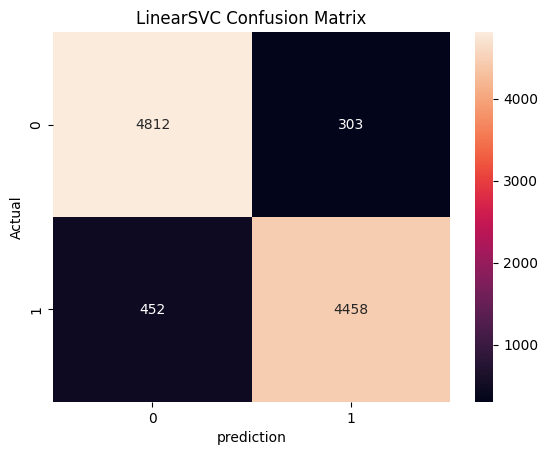

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     20712
           2       0.99      0.97      0.98     19388

    accuracy                           0.98     40100
   macro avg       0.98      0.98      0.98     40100
weighted avg       0.98      0.98      0.98     40100

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      5115
           2       0.94      0.91      0.92      4910

    accuracy                           0.92     10025
   macro avg       0.93      0.92      0.92     10025
weighted avg       0.93      0.92      0.92     10025



In [115]:
trained_clf_svc = LinearSVC().fit(x_train, y_train)
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)

In [116]:
test_scores = trained_clf_svc.decision_function(x_test)
train_scores = trained_clf_svc.decision_function(x_train)

# Convert the decision scores to probabilities using the sigmoid function
test_probabilities = 1 / (1 + np.exp(-test_scores))
train_probabilities = 1 / (1 + np.exp(-train_scores))

# Get the log loss for the test data
test_loss = log_loss(y_test, test_probabilities)
train_loss = log_loss(y_train, train_probabilities)

# Get the predicted class labels
y_test_pred = trained_clf_svc.predict(x_test)
y_train_pred = trained_clf_svc.predict(x_train)

# Print the training and test accuracies and loss
print("Training accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing accuracy :", accuracy_score(y_test, y_test_pred))
print("Training loss    :", train_loss)
print("Testing loss     :", test_loss)


Training accuracy: 0.9813216957605985
Testing accuracy : 0.9246882793017457
Training loss    : 0.26775165469901274
Testing loss     : 0.3076617163658573


In [119]:
import pickle
pickle.dump(trained_clf_svc, open("SVC_Model.pk", "wb"))

### Random Forest

Testing accuracy   : 89.92518703241895 %
Training accuracy  : 99.61596009975062 %
precision :  0.8992518703241895
recall    :  0.8992518703241895
f1_score  :  0.8992518703241895


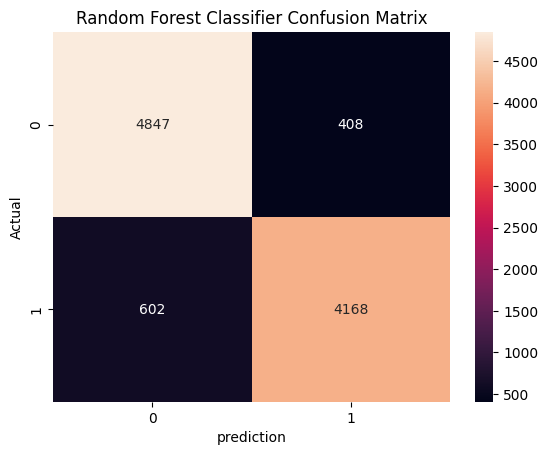

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20572
           2       1.00      0.99      1.00     19528

    accuracy                           1.00     40100
   macro avg       1.00      1.00      1.00     40100
weighted avg       1.00      1.00      1.00     40100

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      5255
           2       0.91      0.87      0.89      4770

    accuracy                           0.90     10025
   macro avg       0.90      0.90      0.90     10025
weighted avg       0.90      0.90      0.90     10025



In [ ]:
trained_clf_random_forest = RandomForestClassifier(n_estimators=30).fit(x_train, y_train)
get_accuracy('Random Forest Classifier',trained_clf_random_forest,x_train, y_train, x_test, y_test)

In [ ]:
y_pred=trained_clf_random_forest.predict(x_test)

test_probabilities = trained_clf_random_forest.predict_proba(x_test)
train_probabilities = trained_clf_random_forest.predict_proba(x_train)

# Get the log loss for the test data
test_loss = log_loss(y_test, test_probabilities)
train_loss = log_loss(y_train, train_probabilities)

# Print the training and test accuracies and loss
print("Training accuracy:", trained_clf_random_forest.score(x_train, y_train))
print("Testing accuracy   :",accuracy_score(y_pred, y_test))
print("Training loss       :", train_loss)
print("Testing loss       :", test_loss)

Training accuracy: 0.9961596009975062
Testing accuracy   : 0.8992518703241895
Training loss       : 0.08726427601782917
Testing loss       : 0.2892194474964418


### Multinomial Naive Bayes

Testing accuracy   : 89.27680798004988 %
Training accuracy  : 91.33416458852868 %
precision :  0.8927680798004988
recall    :  0.8927680798004988
f1_score  :  0.8927680798004988


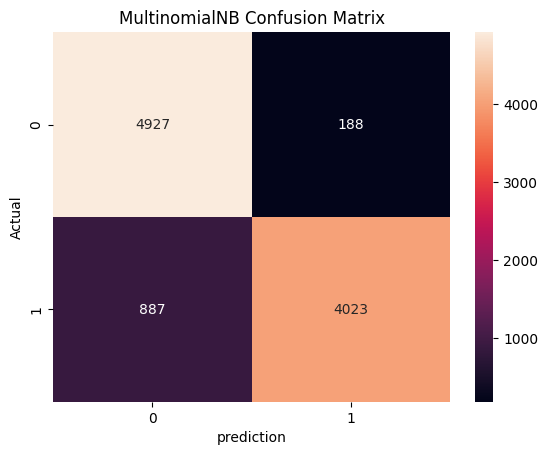

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     20712
           2       0.97      0.85      0.90     19388

    accuracy                           0.91     40100
   macro avg       0.92      0.91      0.91     40100
weighted avg       0.92      0.91      0.91     40100

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5115
           2       0.96      0.82      0.88      4910

    accuracy                           0.89     10025
   macro avg       0.90      0.89      0.89     10025
weighted avg       0.90      0.89      0.89     10025



In [121]:
MNB = MultinomialNB().fit(x_train, y_train)
get_accuracy('MultinomialNB',MNB,x_train, y_train, x_test, y_test)

In [122]:
y_pred=MNB.predict(x_test)

test_probabilities = MNB.predict_proba(x_test)
train_probabilities = MNB.predict_proba(x_train)

# Get the log loss for the test data
test_loss = log_loss(y_test, test_probabilities)
train_loss = log_loss(y_train, train_probabilities)

# Print the training and test accuracies and loss
print("Training accuracy:", MNB.score(x_train, y_train))
print("Testing accuracy   :",accuracy_score(y_pred, y_test))
print("Training loss       :", train_loss)
print("Testing loss       :", test_loss)

Training accuracy: 0.9133416458852868
Testing accuracy   : 0.8927680798004988
Training loss       : 0.22628018537794684
Testing loss       : 0.26648296681595274


### LogisticRegression

Training accuracy  : 94.428927680798 %
Testing accuracy   : 92.34912718204488 %
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5115
           2       0.95      0.89      0.92      4910

    accuracy                           0.92     10025
   macro avg       0.93      0.92      0.92     10025
weighted avg       0.93      0.92      0.92     10025



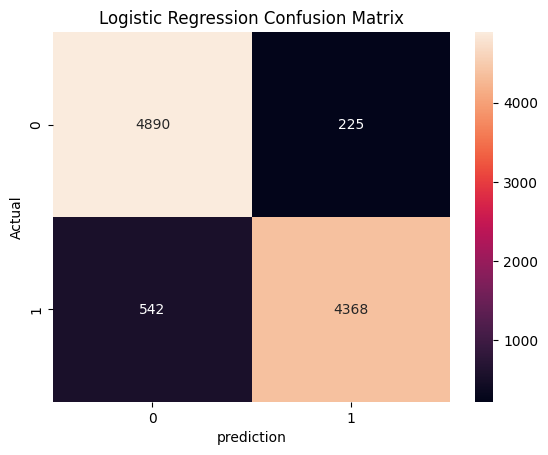

In [113]:
trained_clf_LogisticRegression = LogisticRegression(solver='lbfgs').fit(x_train, y_train)
y_pred=trained_clf_LogisticRegression.predict(x_test)
train_predict = trained_clf_LogisticRegression.predict(x_train)

print("Training accuracy  :",metrics.accuracy_score(y_train, train_predict)*100 ,"%")
print("Testing accuracy   :",metrics.accuracy_score(y_test, y_pred)*100 , "%")
print(classification_report(y_test, y_pred))

cf1 = confusion_matrix(y_test,y_pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('Logistic Regression'+ ' Confusion Matrix')
plt.show()

In [114]:
test_probabilities = trained_clf_LogisticRegression.predict_proba(x_test)
train_probabilities = trained_clf_LogisticRegression.predict_proba(x_train)

# Get the log loss for the test data
test_loss = log_loss(y_test, test_probabilities)
train_loss = log_loss(y_train, train_probabilities)

# Print the training and test accuracies and loss
print("Training accuracy:", trained_clf_LogisticRegression.score(x_train, y_train))
print("Testing accuracy   :",accuracy_score(y_pred, y_test))
print("Training loss       :", train_loss)
print("Testing loss       :", test_loss)

Training accuracy: 0.94428927680798
Testing accuracy   : 0.9234912718204489
Training loss       : 0.17837796559289823
Testing loss       : 0.2084970926832607


In [120]:
import pickle
pickle.dump(trained_clf_LogisticRegression, open("trained_LogisticRegression_model.pk", "wb"))

## Deep Learning Models

### Prepare Data for DL Models

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.39.33.202:8470


REPLICAS:  8


In [ ]:
min_sample = df.groupby(['label']).count().preprocessed_text.min()
input_data = pd.concat([df[df.label == 0].head(min_sample), 
                        df[df.label == 2].head(min_sample)])

X = input_data.preprocessed_text.astype('str').values #training paramter
Y = np.asarray(input_data.label.values).astype('float32') #prediction paramter
Y = Y.clip(0, 1)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
print("vocab size:",len(tokenizer.word_index))
X = pad_sequences(X, padding='post', maxlen=300)

X_train, X_test, label_train, label_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)
print("Training:", len(X_train))
print("Testing: ", len(X_test))

vocab size: 24598
Training: 38876
Testing:  9720


In [ ]:
import pickle
pickle.dump(tokenizer, open("tokenizer_texts_to_sequences.pk", "wb"))

### RNN

In [ ]:
%%time
with strategy.scope():
  dropout = 0.5
  opt = 'adam'
  model4 = Sequential()

  model4.add(layers.Embedding(input_dim=5000, output_dim=100, input_length=300))
  model4.add(layers.SimpleRNN(units=100, return_sequences=True))
  model4.add(layers.GlobalMaxPool1D())
  model4.add(layers.Dense(64, activation='relu'))
  model4.add(layers.Dense(32, activation='relu'))
  model4.add(layers.Dense(1, activation='sigmoid'))

  model4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          500000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 300, 100)          20100     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                        

In [ ]:
history4 = model4.fit(X_train, label_train, epochs=20, verbose=True,  validation_data=(X_test, label_test),batch_size=32*strategy.num_replicas_in_sync)
loss_val, accuracy_val = model4.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

Epoch 1/20
152/152 [==============================] - 15s 99ms/step - loss: 0.4128 - accuracy: 0.8270 - val_loss: 0.3010 - val_accuracy: 0.8831
Epoch 2/20
152/152 [==============================] - 8s 50ms/step - loss: 0.2400 - accuracy: 0.9018 - val_loss: 0.2357 - val_accuracy: 0.9043
Epoch 3/20
152/152 [==============================] - 7s 47ms/step - loss: 0.1983 - accuracy: 0.9210 - val_loss: 0.2405 - val_accuracy: 0.9039
Epoch 4/20
152/152 [==============================] - 9s 58ms/step - loss: 0.1701 - accuracy: 0.9330 - val_loss: 0.2262 - val_accuracy: 0.9102
Epoch 5/20
152/152 [==============================] - 7s 43ms/step - loss: 0.1273 - accuracy: 0.9516 - val_loss: 0.2389 - val_accuracy: 0.9100
Epoch 6/20
152/152 [==============================] - 5s 33ms/step - loss: 0.0891 - accuracy: 0.9685 - val_loss: 0.2710 - val_accuracy: 0.9108
Epoch 7/20
152/152 [==============================] - 6s 37ms/step - loss: 0.0604 - accuracy: 0.9790 - val_loss: 0.3028 - val_accuracy: 0.911

In [ ]:
model4.save('SimpleRNN_Model.h5')

304/304 [==============================] - 5s 14ms/step


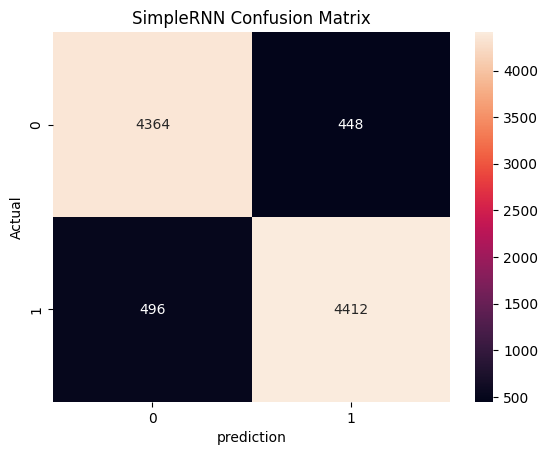

In [ ]:
y_pred4=model4.predict(X_test)
y_pred4 = (y_pred4 >= 0.5).astype(int)
y_test_class=np.array(label_test)

SimpleRNN = confusion_matrix(y_test_class,y_pred4)
sns.heatmap(SimpleRNN,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("SimpleRNN"+ ' Confusion Matrix')
plt.show()

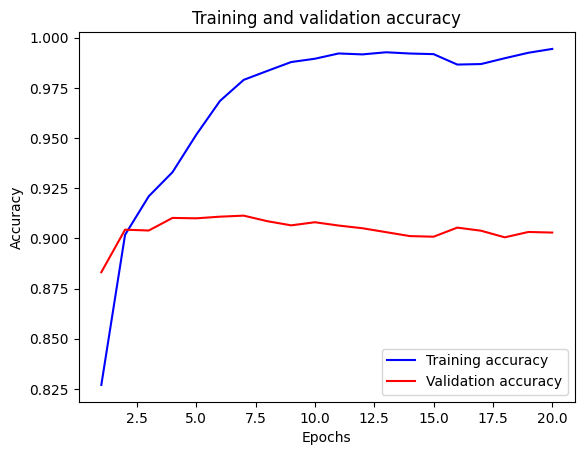

In [ ]:
accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1,len(accuracy) + 1)

# Plot accuracy  
plt.figure(1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

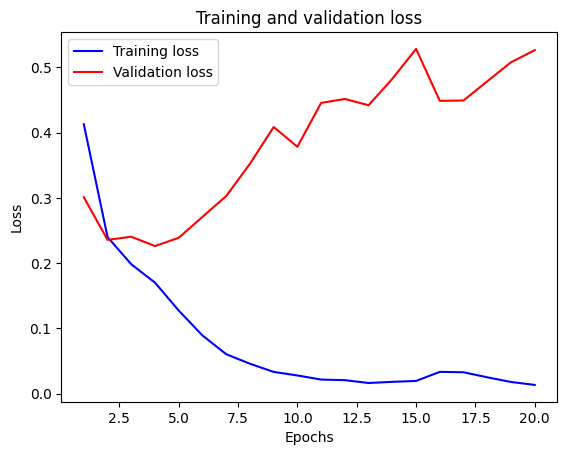

In [ ]:
# Plot loss
plt.figure(2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### CNN

In [ ]:
from keras.layers import Input, Dense, Dropout, Embedding, Conv1D, MaxPooling1D, LSTM, concatenate,Flatten
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.layers import Bidirectional

In [ ]:
with strategy.scope():
  embedding_dim = 100
  CNN_LSTM = Sequential()
  CNN_LSTM.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=300))

  CNN_LSTM.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
  CNN_LSTM.add((LSTM(100, return_sequences=True)))
  CNN_LSTM.add(Flatten())
  CNN_LSTM.add(layers.Dense(64, activation='relu'))
  CNN_LSTM.add(Dense(32, activation='relu'))
  CNN_LSTM.add(Dense(1, activation='sigmoid'))

  CNN_LSTM.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
CNN_LSTM.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 300, 100)          2459900   
                                                                 
 conv1d_8 (Conv1D)           (None, 298, 32)           9632      
                                                                 
 lstm_8 (LSTM)               (None, 298, 100)          53200     
                                                                 
 flatten_1 (Flatten)         (None, 29800)             0         
                                                                 
 dense_5 (Dense)             (None, 64)                1907264   
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
history6 = CNN_LSTM.fit(X_train, label_train, epochs=30, verbose=True,  validation_data=(X_test, label_test),batch_size=64*strategy.num_replicas_in_sync)
loss_val, accuracy_val = CNN_LSTM.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

Epoch 1/30
76/76 [==============================] - 23s 172ms/step - loss: 0.4424 - accuracy: 0.7682 - val_loss: 0.2363 - val_accuracy: 0.9023
Epoch 2/30
76/76 [==============================] - 7s 88ms/step - loss: 0.1862 - accuracy: 0.9266 - val_loss: 0.2199 - val_accuracy: 0.9107
Epoch 3/30
76/76 [==============================] - 6s 84ms/step - loss: 0.1399 - accuracy: 0.9456 - val_loss: 0.2384 - val_accuracy: 0.9107
Epoch 4/30
76/76 [==============================] - 6s 84ms/step - loss: 0.1056 - accuracy: 0.9614 - val_loss: 0.2557 - val_accuracy: 0.9062
Epoch 5/30
76/76 [==============================] - 6s 83ms/step - loss: 0.0768 - accuracy: 0.9725 - val_loss: 0.2937 - val_accuracy: 0.9083
Epoch 6/30
76/76 [==============================] - 6s 82ms/step - loss: 0.0605 - accuracy: 0.9784 - val_loss: 0.3436 - val_accuracy: 0.9013
Epoch 7/30
76/76 [==============================] - 6s 83ms/step - loss: 0.0468 - accuracy: 0.9837 - val_loss: 0.4311 - val_accuracy: 0.9035
Epoch 8/30


In [ ]:
CNN_LSTM.save('CNN_LSTM.h5')

304/304 [==============================] - 7s 17ms/step


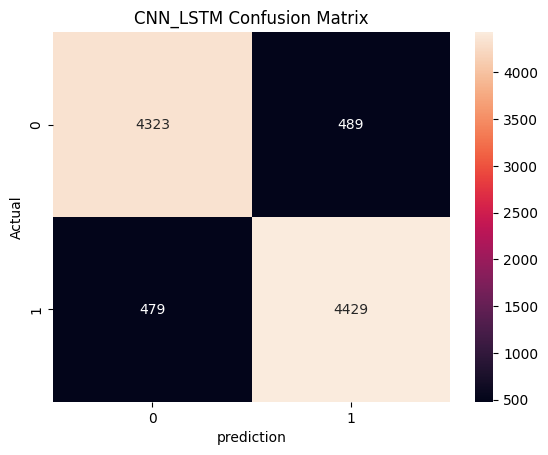

In [ ]:
y_pred6=CNN_LSTM.predict(X_test)
y_pred6 = (y_pred6 >= 0.5).astype(int)
y_test_class=np.array(label_test)

CNN_LSTM = confusion_matrix(y_test_class,y_pred6)
sns.heatmap(CNN_LSTM,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("CNN_LSTM"+ ' Confusion Matrix')
plt.show()

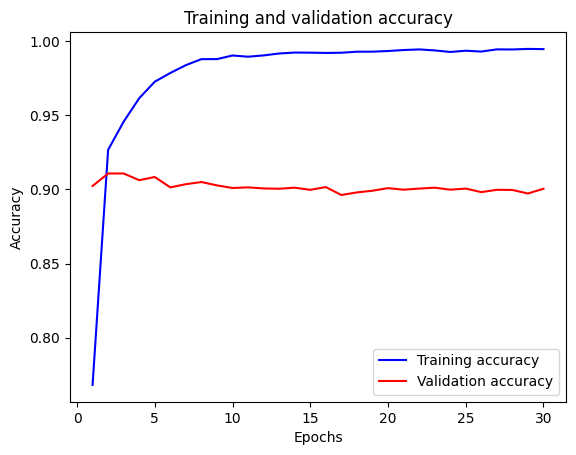

In [ ]:
accuracy = history6.history['accuracy']
val_accuracy = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(1,len(accuracy) + 1)

# Plot accuracy  
plt.figure(1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

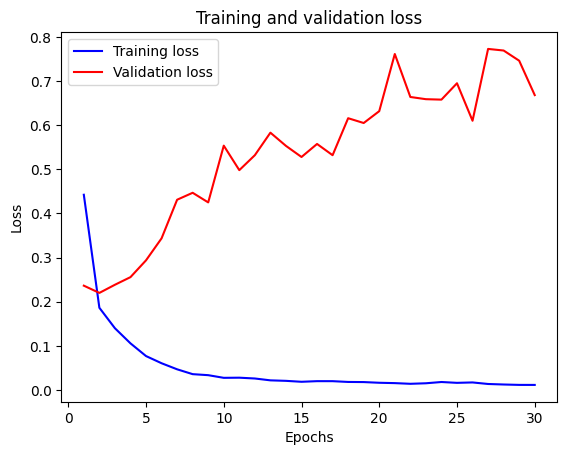

In [ ]:
# Plot loss
plt.figure(2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### LSTM

In [ ]:
# LSTM model with keras
%%time
with strategy.scope():
    dropout = 0.5
    opt = 'adam'
    model2 = Sequential()
    model2.add(layers.Embedding(input_dim=5000, output_dim=100, input_length=300))

    model2.add(layers.LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
    model2.add(layers.LSTM(60, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
    model2.add(layers.GlobalMaxPool1D())
    model2.add(layers.Dense(128, activation='relu'))
    model2.add(layers.Dropout(dropout))
    model2.add(layers.Dense(64, activation='relu'))
    model2.add(layers.Dropout(dropout))
    model2.add(layers.Dense(32, activation='relu'))
    model2.add(layers.Dropout(dropout))
    model2.add(layers.Dense(1, activation='sigmoid'))

    model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 300, 100)          500000    
                                                                 
 lstm_5 (LSTM)               (None, 300, 100)          80400     
                                                                 
 lstm_6 (LSTM)               (None, 300, 60)           38640     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 60)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_10 (Dense)            (None, 128)               7808      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
history2 = model2.fit(X_train, label_train, epochs=20, verbose=True,  validation_data=(X_test, label_test),batch_size=32*strategy.num_replicas_in_sync)
loss_val, accuracy_val = model2.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

Epoch 1/20
152/152 [==============================] - 49s 223ms/step - loss: 0.5888 - accuracy: 0.6420 - val_loss: 0.3267 - val_accuracy: 0.8764
Epoch 2/20
152/152 [==============================] - 23s 148ms/step - loss: 0.2907 - accuracy: 0.8966 - val_loss: 0.2413 - val_accuracy: 0.9042
Epoch 3/20
152/152 [==============================] - 23s 151ms/step - loss: 0.2259 - accuracy: 0.9159 - val_loss: 0.2330 - val_accuracy: 0.9038
Epoch 4/20
152/152 [==============================] - 23s 149ms/step - loss: 0.2083 - accuracy: 0.9237 - val_loss: 0.2274 - val_accuracy: 0.9053
Epoch 5/20
152/152 [==============================] - 23s 151ms/step - loss: 0.1877 - accuracy: 0.9296 - val_loss: 0.2352 - val_accuracy: 0.9004
Epoch 6/20
152/152 [==============================] - 23s 151ms/step - loss: 0.1789 - accuracy: 0.9331 - val_loss: 0.2444 - val_accuracy: 0.9033
Epoch 7/20
152/152 [==============================] - 23s 148ms/step - loss: 0.1691 - accuracy: 0.9366 - val_loss: 0.2439 - val_ac

In [ ]:
model2.save('LSTM_Model.h5')

304/304 [==============================] - 10s 29ms/step


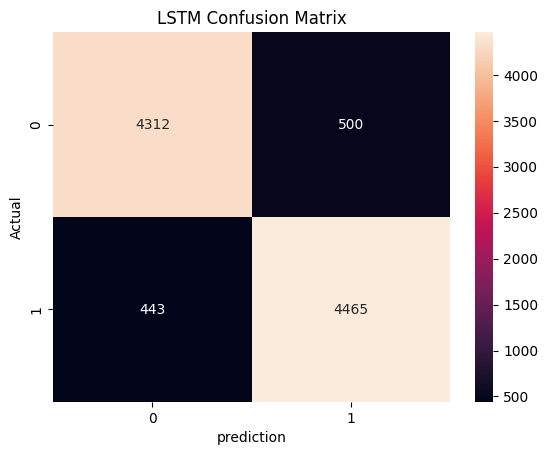

In [ ]:
y_pred2=model2.predict(X_test)
y_pred2 = (y_pred2 >= 0.5).astype(int)
y_test_class=np.array(label_test)

lstm = confusion_matrix(y_test_class,y_pred2)
sns.heatmap(lstm,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("LSTM"+ ' Confusion Matrix')
plt.show()

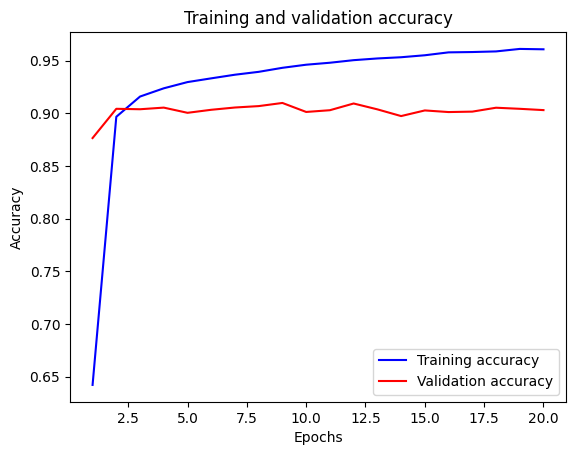

In [ ]:
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1,len(accuracy) + 1)

# Plot accuracy  
plt.figure(1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


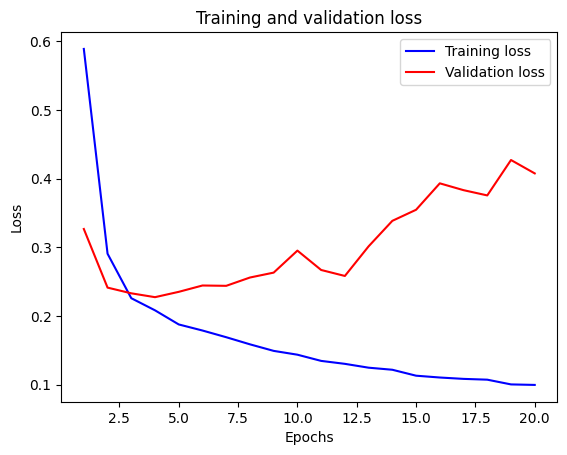

In [ ]:
# Plot loss
plt.figure(2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### BILSTM

In [ ]:
%%time
with strategy.scope():
  #create BILSTM model with keras
  dropout = 0.5
  opt = 'adam'
  # clear_session()
  model3 = Sequential()
  model3.add(layers.Embedding(input_dim=5000, output_dim=100, input_length=300))
  model3.add(layers.Bidirectional(layers.LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))

  model3.add(layers.Bidirectional(layers.LSTM(60, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
  model3.add(layers.GlobalMaxPool1D())
  model3.add(layers.Dense(128, activation='relu'))
  model3.add(layers.Dropout(dropout))
  model3.add(layers.Dense(64, activation='relu'))
  model3.add(layers.Dropout(dropout))
  model3.add(layers.Dense(32, activation='relu'))
  model3.add(layers.Dropout(dropout))
  model3.add(layers.Dense(1, activation='sigmoid'))

  model3.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 300, 100)          500000    
                                                                 
 bidirectional (Bidirectiona  (None, 300, 200)         160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 300, 120)         125280    
 nal)                                                            
                                                                 
 global_max_pooling1d_3 (Glo  (None, 120)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_14 (Dense)            (None, 128)               15488     
                                                      

In [ ]:
history3 = model3.fit(X_train, label_train, epochs=15, verbose=True,  validation_data=(X_test, label_test),batch_size=32*strategy.num_replicas_in_sync)
loss_val, accuracy_val = model3.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

Epoch 1/15
152/152 [==============================] - 106s 528ms/step - loss: 0.6567 - accuracy: 0.5727 - val_loss: 0.4331 - val_accuracy: 0.8599
Epoch 2/15
152/152 [==============================] - 60s 396ms/step - loss: 0.3111 - accuracy: 0.8844 - val_loss: 0.2367 - val_accuracy: 0.9048
Epoch 3/15
152/152 [==============================] - 60s 394ms/step - loss: 0.2339 - accuracy: 0.9115 - val_loss: 0.2427 - val_accuracy: 0.9010
Epoch 4/15
152/152 [==============================] - 60s 393ms/step - loss: 0.2064 - accuracy: 0.9232 - val_loss: 0.2257 - val_accuracy: 0.9074
Epoch 5/15
152/152 [==============================] - 60s 395ms/step - loss: 0.1891 - accuracy: 0.9276 - val_loss: 0.2370 - val_accuracy: 0.9105
Epoch 6/15
152/152 [==============================] - 60s 393ms/step - loss: 0.1754 - accuracy: 0.9317 - val_loss: 0.2435 - val_accuracy: 0.9105
Epoch 7/15
152/152 [==============================] - 60s 395ms/step - loss: 0.1636 - accuracy: 0.9359 - val_loss: 0.2616 - val_a

In [ ]:
model3.save('BILSTM_Model.h5')

304/304 [==============================] - 20s 45ms/step


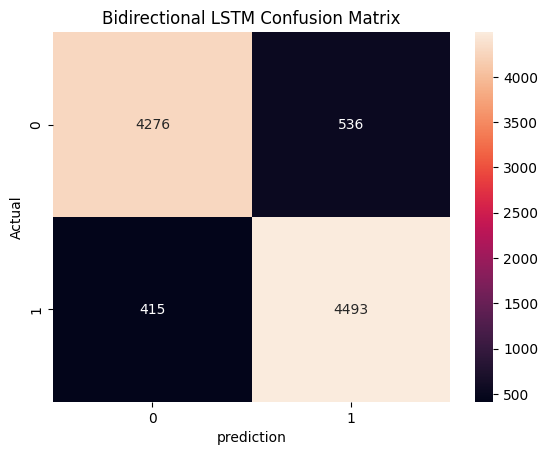

In [ ]:
y_pred2=model3.predict(X_test)
y_pred2 = (y_pred2 >= 0.5).astype(int)
y_test_class=np.array(label_test)

lstm = confusion_matrix(y_test_class,y_pred2)
sns.heatmap(lstm,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("Bidirectional LSTM"+ ' Confusion Matrix')
plt.show()

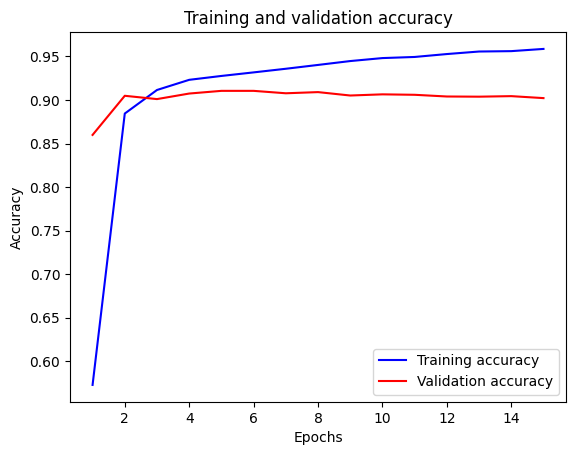

In [ ]:
accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1,len(accuracy) + 1)

# Plot accuracy  
plt.figure(1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

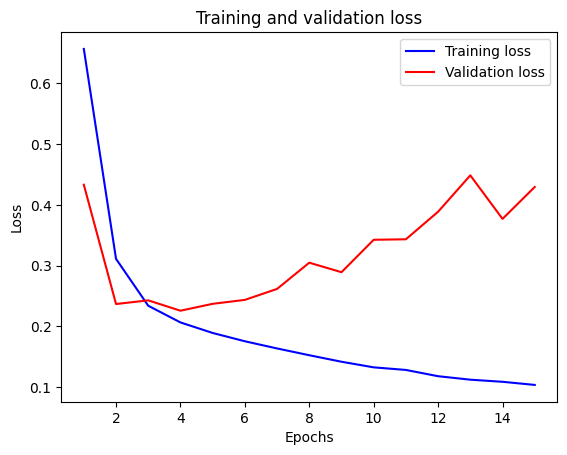

In [ ]:
# Plot loss
plt.figure(2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Bidirectional GRU

In [ ]:
%%time
with strategy.scope():
  #create BIGRU model with keras
  dropout = 0.5
  opt = 'adam'
  # clear_session()
  model = Sequential()
  model.add(layers.Embedding(input_dim=5000, output_dim=100, input_length=300))
  model.add(layers.Bidirectional(layers.GRU(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
  
  model.add(layers.Bidirectional(layers.GRU(50, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
  model.add(layers.GlobalMaxPool1D())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 300, 100)          500000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 300, 200)         121200    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 300, 100)         75600     
 nal)                                                            
                                                                 
 global_max_pooling1d_4 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_18 (Dense)            (None, 128)               12928     
                                                      

In [ ]:
history = model.fit(X_train, label_train, epochs=15, verbose=True,  validation_data=(X_test, label_test),batch_size=32*strategy.num_replicas_in_sync)
loss_val, accuracy_val = model.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

Epoch 1/15
152/152 [==============================] - 87s 570ms/step - loss: 0.4539 - accuracy: 0.7608 - val_loss: 0.2283 - val_accuracy: 0.9080
Epoch 2/15
152/152 [==============================] - 68s 449ms/step - loss: 0.2274 - accuracy: 0.9170 - val_loss: 0.2157 - val_accuracy: 0.9133
Epoch 3/15
152/152 [==============================] - 68s 448ms/step - loss: 0.1932 - accuracy: 0.9275 - val_loss: 0.2261 - val_accuracy: 0.9121
Epoch 4/15
152/152 [==============================] - 68s 448ms/step - loss: 0.1731 - accuracy: 0.9352 - val_loss: 0.2279 - val_accuracy: 0.9114
Epoch 5/15
152/152 [==============================] - 68s 449ms/step - loss: 0.1561 - accuracy: 0.9413 - val_loss: 0.2428 - val_accuracy: 0.9118
Epoch 6/15
152/152 [==============================] - 68s 450ms/step - loss: 0.1422 - accuracy: 0.9463 - val_loss: 0.2506 - val_accuracy: 0.9127
Epoch 7/15
152/152 [==============================] - 68s 450ms/step - loss: 0.1314 - accuracy: 0.9503 - val_loss: 0.2866 - val_ac

In [ ]:
model.save('BIGRU_Model.h5')

304/304 [==============================] - 16s 44ms/step


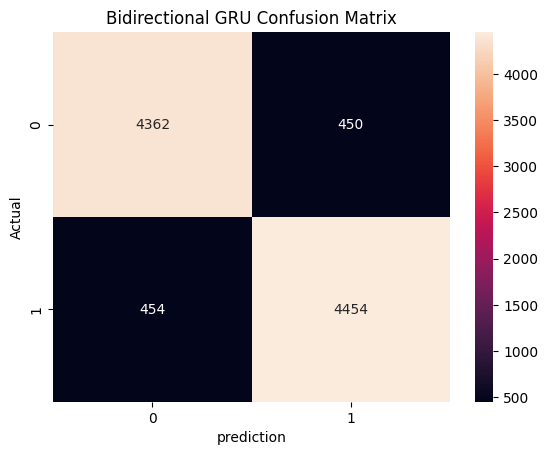

In [ ]:
y_pred=model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
y_test_class=np.array(label_test)

GRU = confusion_matrix(y_test_class,y_pred)
sns.heatmap(GRU,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("Bidirectional GRU"+ ' Confusion Matrix')
plt.show()

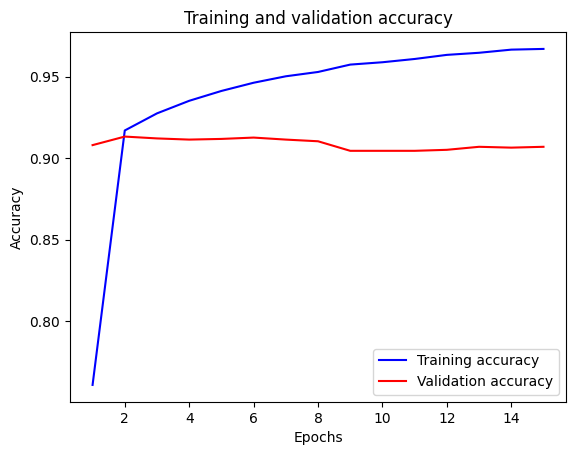

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy) + 1)

# Plot accuracy  
plt.figure(1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

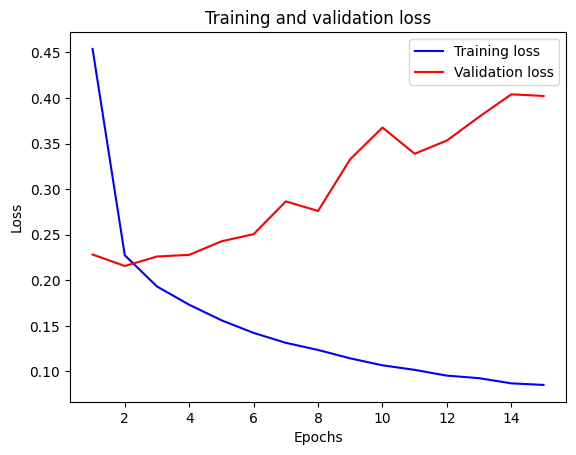

In [ ]:
# Plot loss
plt.figure(2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()